In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

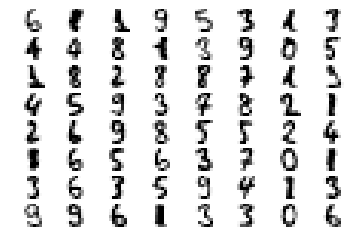

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.48968 stdev: 0.16346
Best fitness: 0.96000 - size: (2, 13) - species 4 - id 91
Average adjusted fitness: 0.428
Mean genetic distance 2.969, standard deviation 0.488
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 1.449 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56794 stdev: 0.18346
Best fitness: 0.97846 - size: (3, 15) - species 1 - id 374
Average adjusted fitness: 0.524
Mean genetic distance 3.083, standard deviation 0.491
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 1.696 sec (1.572 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62065 stdev: 0.19399
Best fitness: 0.98462 - size: (3, 15) - species 23 - id 499
Average adjusted fitness: 0.546
Mean genetic distance 3.104, standard deviation 0.483
Population of 205 members in 38 species
Total extinctio

Population's average fitness: 0.80285 stdev: 0.20096
Best fitness: 0.99692 - size: (5, 18) - species 5 - id 2237
Average adjusted fitness: 0.734
Mean genetic distance 3.259, standard deviation 0.468
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 1.841 sec (1.875 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80071 stdev: 0.19265
Best fitness: 0.99692 - size: (7, 21) - species 50 - id 3140
Average adjusted fitness: 0.528
Mean genetic distance 3.262, standard deviation 0.479
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 1.827 sec (1.869 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78240 stdev: 0.20082
Best fitness: 0.99692 - size: (7, 21) - species 50 - id 3140
Average adjusted fitness: 0.726
Mean genetic distance 3.261, standard deviation 0.475
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 1.802 sec (1.852 average)

 ****** 

Total extinctions: 0
Generation time: 1.512 sec (1.649 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68305 stdev: 0.18623
Best fitness: 0.99083 - size: (3, 15) - species 2 - id 671
Average adjusted fitness: 0.521
Mean genetic distance 3.160, standard deviation 0.528
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 2.011 sec (1.721 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70095 stdev: 0.19592
Best fitness: 0.99694 - size: (4, 16) - species 2 - id 962
Average adjusted fitness: 0.642
Mean genetic distance 3.191, standard deviation 0.517
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 1.689 sec (1.716 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71432 stdev: 0.19990
Best fitness: 0.99694 - size: (4, 16) - species 25 - id 1086
Average adjusted fitness: 0.559
Mean genetic distance 3.181, standard deviation 0.511
Population of 2

Population's average fitness: 0.76295 stdev: 0.19920
Best fitness: 0.99690 - size: (5, 18) - species 14 - id 2060
Average adjusted fitness: 0.525
Mean genetic distance 3.240, standard deviation 0.514
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 2.120 sec (1.751 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.76558 stdev: 0.18986
Best fitness: 0.99690 - size: (5, 18) - species 14 - id 2060
Average adjusted fitness: 0.597
Mean genetic distance 3.254, standard deviation 0.541
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 1.895 sec (1.775 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75265 stdev: 0.20131
Best fitness: 0.99690 - size: (5, 18) - species 14 - id 2060
Average adjusted fitness: 0.462
Mean genetic distance 3.262, standard deviation 0.533
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 1.755 sec (1.776 average)

 ******

Population's average fitness: 0.70117 stdev: 0.20596
Best fitness: 0.98773 - size: (5, 17) - species 18 - id 1287
Average adjusted fitness: 0.630
Mean genetic distance 3.131, standard deviation 0.485
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 2.212 sec (2.035 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70077 stdev: 0.20111
Best fitness: 0.98773 - size: (7, 21) - species 21 - id 1506
Average adjusted fitness: 0.599
Mean genetic distance 3.129, standard deviation 0.487
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 2.597 sec (2.090 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72803 stdev: 0.19052
Best fitness: 0.98773 - size: (7, 21) - species 21 - id 1506
Average adjusted fitness: 0.597
Mean genetic distance 3.123, standard deviation 0.490
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 2.172 sec (2.069 average)

 ******

Population's average fitness: 0.49620 stdev: 0.13763
Best fitness: 0.98769 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.470
Mean genetic distance 2.840, standard deviation 0.442
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 1.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58615 stdev: 0.18413
Best fitness: 0.98769 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.553
Mean genetic distance 2.972, standard deviation 0.479
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 1.785 sec (1.706 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62589 stdev: 0.18454
Best fitness: 0.99692 - size: (3, 16) - species 2 - id 530
Average adjusted fitness: 0.452
Mean genetic distance 3.040, standard deviation 0.487
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 1.690 sec (1.700 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49958 stdev: 0.14915
Best fitness: 0.99383 - size: (2, 13) - species 3 - id 60
Average adjusted fitness: 0.446
Mean genetic distance 2.919, standard deviation 0.442
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 1.211 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58240 stdev: 0.16611
Best fitness: 0.99383 - size: (2, 13) - species 3 - id 60
Average adjusted fitness: 0.526
Mean genetic distance 2.972, standard deviation 0.437
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 1.764 sec (1.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61600 stdev: 0.18035
Best fitness: 0.99691 - size: (3, 14) - species 14 - id 408
Average adjusted fitness: 0.500
Mean genetic distance 2.983, standard deviation 0.440
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 1.873 sec (1.616 average)

 ****** Running generation 3 ***

Mean genetic distance 3.057, standard deviation 0.482
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 2.105 sec (1.944 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71803 stdev: 0.16003
Best fitness: 0.94737 - size: (3, 15) - species 4 - id 2382
Average adjusted fitness: 0.444
Mean genetic distance 3.090, standard deviation 0.497
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 1.738 sec (1.961 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71919 stdev: 0.15685
Best fitness: 0.94737 - size: (3, 15) - species 4 - id 2382
Average adjusted fitness: 0.343
Mean genetic distance 3.100, standard deviation 0.491
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 2.998 sec (2.101 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72974 stdev: 0.15823
Best fitness: 0.94737 - size: (3, 15) - species 4 - id 2382
Ave

Mean genetic distance 3.151, standard deviation 0.480
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 1.790 sec (1.477 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66199 stdev: 0.15197
Best fitness: 0.97866 - size: (3, 14) - species 10 - id 630
Average adjusted fitness: 0.488
Mean genetic distance 3.183, standard deviation 0.478
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 1.560 sec (1.489 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68054 stdev: 0.14327
Best fitness: 0.97866 - size: (3, 14) - species 10 - id 630
Average adjusted fitness: 0.371
Mean genetic distance 3.160, standard deviation 0.486
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 1.613 sec (1.505 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68035 stdev: 0.15392
Best fitness: 0.98171 - size: (4, 14) - species 10 - id 1336
Avera

Mean genetic distance 3.273, standard deviation 0.508
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 2.072 sec (1.959 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.75305 stdev: 0.17127
Best fitness: 0.99390 - size: (5, 17) - species 10 - id 2213
Average adjusted fitness: 0.475
Mean genetic distance 3.271, standard deviation 0.514
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 2.031 sec (1.972 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.75822 stdev: 0.17127
Best fitness: 0.99390 - size: (5, 17) - species 10 - id 2213
Average adjusted fitness: 0.281
Mean genetic distance 3.257, standard deviation 0.502
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 2.143 sec (2.000 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73527 stdev: 0.17726
Best fitness: 0.99390 - size: (5, 17) - species 10 - id 2213


Mean genetic distance 3.251, standard deviation 0.480
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 1.723 sec (1.701 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73399 stdev: 0.15569
Best fitness: 0.95679 - size: (7, 23) - species 38 - id 2922
Average adjusted fitness: 0.425
Mean genetic distance 3.247, standard deviation 0.484
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 1.872 sec (1.723 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72808 stdev: 0.15523
Best fitness: 0.95679 - size: (7, 23) - species 38 - id 2922
Average adjusted fitness: 0.371
Mean genetic distance 3.244, standard deviation 0.495
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 1.832 sec (1.744 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71341 stdev: 0.16964
Best fitness: 0.95679 - size: (7, 23) - species 38 - id 2922


Mean genetic distance 3.104, standard deviation 0.469
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 1.674 sec (1.807 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72630 stdev: 0.15239
Best fitness: 0.95107 - size: (7, 21) - species 1 - id 1937
Average adjusted fitness: 0.411
Mean genetic distance 3.095, standard deviation 0.469
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 1.710 sec (1.791 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71986 stdev: 0.15307
Best fitness: 0.97248 - size: (5, 22) - species 31 - id 2054
Average adjusted fitness: 0.529
Mean genetic distance 3.118, standard deviation 0.460
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 1.765 sec (1.805 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72681 stdev: 0.15635
Best fitness: 0.97248 - size: (5, 22) - species 31 - id 2054
A


Population's average fitness: 0.62664 stdev: 0.17972
Best fitness: 0.96012 - size: (4, 16) - species 4 - id 536
Average adjusted fitness: 0.494
Mean genetic distance 2.955, standard deviation 0.479
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 1.529 sec (1.398 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64363 stdev: 0.16733
Best fitness: 0.98160 - size: (3, 15) - species 9 - id 750
Average adjusted fitness: 0.521
Mean genetic distance 2.981, standard deviation 0.480
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 1.526 sec (1.424 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65919 stdev: 0.17022
Best fitness: 0.98160 - size: (3, 15) - species 9 - id 750
Average adjusted fitness: 0.508
Mean genetic distance 3.017, standard deviation 0.461
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 1.549 sec (1.445 average)

 ****** Runnin

Population's average fitness: 0.73861 stdev: 0.18680
Best fitness: 0.98773 - size: (6, 25) - species 27 - id 3242
Average adjusted fitness: 0.469
Mean genetic distance 3.258, standard deviation 0.500
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 1.955 sec (1.914 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77525 stdev: 0.17327
Best fitness: 0.98773 - size: (6, 25) - species 27 - id 3242
Average adjusted fitness: 0.704
Mean genetic distance 3.274, standard deviation 0.503
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 1.964 sec (1.935 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.75580 stdev: 0.17985
Best fitness: 0.99387 - size: (6, 26) - species 27 - id 4224
Average adjusted fitness: 0.498
Mean genetic distance 3.274, standard deviation 0.512
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 2.011 sec (1.953 average)

 ******

Population's average fitness: 0.73558 stdev: 0.16955
Best fitness: 0.98762 - size: (5, 19) - species 36 - id 2294
Average adjusted fitness: 0.512
Mean genetic distance 3.133, standard deviation 0.459
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 1.830 sec (1.733 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71541 stdev: 0.16794
Best fitness: 0.98762 - size: (5, 19) - species 36 - id 2294
Average adjusted fitness: 0.365
Mean genetic distance 3.134, standard deviation 0.472
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 1.825 sec (1.757 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74045 stdev: 0.15928
Best fitness: 0.98762 - size: (5, 19) - species 36 - id 2294
Average adjusted fitness: 0.433
Mean genetic distance 3.147, standard deviation 0.461
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 1.811 sec (1.783 average)

 ******

Population's average fitness: 0.63361 stdev: 0.12252
Best fitness: 0.89375 - size: (3, 14) - species 7 - id 1547
Average adjusted fitness: 0.360
Mean genetic distance 3.104, standard deviation 0.518
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 2.044 sec (1.876 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63609 stdev: 0.12021
Best fitness: 0.89375 - size: (3, 14) - species 15 - id 1547
Average adjusted fitness: 0.285
Mean genetic distance 3.104, standard deviation 0.514
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 2.215 sec (1.971 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64088 stdev: 0.12952
Best fitness: 0.89375 - size: (3, 14) - species 33 - id 1547
Average adjusted fitness: 0.391
Mean genetic distance 3.090, standard deviation 0.514
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 1.648 sec (1.995 average)

 ****** 

Population's average fitness: 0.49935 stdev: 0.12470
Best fitness: 0.92923 - size: (2, 13) - species 9 - id 170
Average adjusted fitness: 0.390
Mean genetic distance 2.877, standard deviation 0.437
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 1.231 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56179 stdev: 0.12839
Best fitness: 0.95077 - size: (3, 15) - species 27 - id 380
Average adjusted fitness: 0.313
Mean genetic distance 2.954, standard deviation 0.456
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 1.357 sec (1.294 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60533 stdev: 0.12587
Best fitness: 0.95077 - size: (3, 15) - species 27 - id 380
Average adjusted fitness: 0.285
Mean genetic distance 2.990, standard deviation 0.490
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 1.391 sec (1.326 average)

 ****** Running generation 3 

Population's average fitness: 0.71778 stdev: 0.15095
Best fitness: 0.96000 - size: (4, 16) - species 27 - id 2611
Average adjusted fitness: 0.405
Mean genetic distance 3.218, standard deviation 0.491
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 1.841 sec (1.804 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.71166 stdev: 0.15553
Best fitness: 0.96000 - size: (4, 16) - species 27 - id 2611
Average adjusted fitness: 0.467
Mean genetic distance 3.205, standard deviation 0.485
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 1.864 sec (1.814 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71683 stdev: 0.15006
Best fitness: 0.96000 - size: (4, 16) - species 27 - id 2611
Average adjusted fitness: 0.403
Mean genetic distance 3.224, standard deviation 0.481
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 1.828 sec (1.822 average)

 ******

Population's average fitness: 0.71874 stdev: 0.16876
Best fitness: 0.95692 - size: (5, 18) - species 27 - id 2185
Average adjusted fitness: 0.596
Mean genetic distance 3.195, standard deviation 0.485
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 1.758 sec (1.673 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72101 stdev: 0.18233
Best fitness: 0.95692 - size: (7, 22) - species 22 - id 2310
Average adjusted fitness: 0.578
Mean genetic distance 3.229, standard deviation 0.485
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 1.696 sec (1.681 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72583 stdev: 0.17135
Best fitness: 0.96615 - size: (6, 22) - species 38 - id 2424
Average adjusted fitness: 0.593
Mean genetic distance 3.247, standard deviation 0.483
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 1.724 sec (1.691 average)

 ******


Population's average fitness: 0.59160 stdev: 0.13928
Best fitness: 0.93519 - size: (3, 15) - species 5 - id 362
Average adjusted fitness: 0.391
Mean genetic distance 3.091, standard deviation 0.477
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 1.477 sec (1.347 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63149 stdev: 0.15248
Best fitness: 0.93519 - size: (3, 15) - species 5 - id 362
Average adjusted fitness: 0.473
Mean genetic distance 3.141, standard deviation 0.494
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 1.536 sec (1.394 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63545 stdev: 0.15364
Best fitness: 0.95679 - size: (4, 17) - species 37 - id 784
Average adjusted fitness: 0.535
Mean genetic distance 3.156, standard deviation 0.488
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 1.521 sec (1.419 average)

 ****** Runni

Population of 194 members in 27 species
Total extinctions: 0
Generation time: 1.750 sec (1.696 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.71909 stdev: 0.18035
Best fitness: 0.98457 - size: (6, 20) - species 46 - id 1661
Average adjusted fitness: 0.535
Mean genetic distance 3.255, standard deviation 0.534
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 1.745 sec (1.706 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73253 stdev: 0.18081
Best fitness: 0.98457 - size: (6, 20) - species 46 - id 1661
Average adjusted fitness: 0.592
Mean genetic distance 3.267, standard deviation 0.529
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 1.892 sec (1.725 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73889 stdev: 0.17559
Best fitness: 0.98457 - size: (6, 20) - species 46 - id 1661
Average adjusted fitness: 0.375
Mean genetic distance 

Mean genetic distance 3.192, standard deviation 0.487
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 1.839 sec (1.697 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.79109 stdev: 0.18172
Best fitness: 0.99690 - size: (5, 18) - species 29 - id 1138
Average adjusted fitness: 0.600
Mean genetic distance 3.187, standard deviation 0.484
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 1.657 sec (1.695 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.80100 stdev: 0.17159
Best fitness: 0.99690 - size: (5, 18) - species 29 - id 1138
Average adjusted fitness: 0.384
Mean genetic distance 3.177, standard deviation 0.484
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 1.797 sec (1.707 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.77203 stdev: 0.18749
Best fitness: 0.99690 - size: (5, 18) - species 29 - id 1138


Mean genetic distance 3.170, standard deviation 0.500
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 1.861 sec (1.494 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66482 stdev: 0.13214
Best fitness: 0.89590 - size: (9, 27) - species 7 - id 1416
Average adjusted fitness: 0.324
Mean genetic distance 3.191, standard deviation 0.501
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 1.602 sec (1.532 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66987 stdev: 0.13078
Best fitness: 0.89590 - size: (9, 27) - species 7 - id 1416
Average adjusted fitness: 0.410
Mean genetic distance 3.251, standard deviation 0.509
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 1.600 sec (1.560 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67230 stdev: 0.13854
Best fitness: 0.90536 - size: (4, 17) - species 2 - id 1765
Ave

Population's average fitness: 0.57855 stdev: 0.14698
Best fitness: 0.88199 - size: (2, 14) - species 5 - id 269
Average adjusted fitness: 0.467
Mean genetic distance 3.066, standard deviation 0.535
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 1.306 sec (1.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59944 stdev: 0.16121
Best fitness: 0.91925 - size: (3, 14) - species 6 - id 478
Average adjusted fitness: 0.512
Mean genetic distance 3.125, standard deviation 0.522
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 1.396 sec (1.313 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62360 stdev: 0.15212
Best fitness: 0.95652 - size: (4, 18) - species 29 - id 568
Average adjusted fitness: 0.463
Mean genetic distance 3.136, standard deviation 0.518
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 1.452 sec (1.348 average)

 ****** Runnin

Population's average fitness: 0.74382 stdev: 0.16715
Best fitness: 0.98758 - size: (7, 22) - species 23 - id 2935
Average adjusted fitness: 0.496
Mean genetic distance 3.208, standard deviation 0.496
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 1.817 sec (1.727 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.75157 stdev: 0.16088
Best fitness: 0.98758 - size: (7, 22) - species 23 - id 2935
Average adjusted fitness: 0.407
Mean genetic distance 3.216, standard deviation 0.506
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 1.736 sec (1.741 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.74558 stdev: 0.17106
Best fitness: 0.98758 - size: (7, 22) - species 23 - id 2935
Average adjusted fitness: 0.470
Mean genetic distance 3.257, standard deviation 0.495
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 2.115 sec (1.787 average)

 ******

Mean genetic distance 3.170, standard deviation 0.484
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 1.690 sec (1.615 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71576 stdev: 0.17656
Best fitness: 0.98176 - size: (2, 12) - species 3 - id 681
Average adjusted fitness: 0.478
Mean genetic distance 3.170, standard deviation 0.477
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 1.659 sec (1.620 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72035 stdev: 0.17354
Best fitness: 0.98176 - size: (5, 16) - species 36 - id 2053
Average adjusted fitness: 0.501
Mean genetic distance 3.173, standard deviation 0.477
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 1.745 sec (1.638 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71678 stdev: 0.16726
Best fitness: 0.98176 - size: (5, 16) - species 36 - id 2053
Av

Mean genetic distance 3.032, standard deviation 0.492
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 1.492 sec (1.385 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66865 stdev: 0.17670
Best fitness: 0.97866 - size: (2, 14) - species 30 - id 369
Average adjusted fitness: 0.542
Mean genetic distance 3.044, standard deviation 0.487
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 1.427 sec (1.394 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68054 stdev: 0.18118
Best fitness: 0.97866 - size: (2, 14) - species 30 - id 369
Average adjusted fitness: 0.621
Mean genetic distance 3.087, standard deviation 0.486
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 1.531 sec (1.417 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67845 stdev: 0.17609
Best fitness: 0.98476 - size: (3, 15) - species 33 - id 1065
Avera

Mean genetic distance 3.189, standard deviation 0.506
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 1.942 sec (1.795 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.80007 stdev: 0.18401
Best fitness: 0.99390 - size: (5, 15) - species 33 - id 3453
Average adjusted fitness: 0.413
Mean genetic distance 3.143, standard deviation 0.529
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 1.903 sec (1.820 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.81140 stdev: 0.18461
Best fitness: 0.99390 - size: (5, 15) - species 33 - id 3453
Average adjusted fitness: 0.548
Mean genetic distance 3.142, standard deviation 0.520
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 1.863 sec (1.844 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.79428 stdev: 0.18973
Best fitness: 0.99390 - size: (5, 15) - species 33 - id 3453


Mean genetic distance 3.242, standard deviation 0.475
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 1.782 sec (1.715 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.78033 stdev: 0.19129
Best fitness: 0.98462 - size: (5, 17) - species 4 - id 2534
Average adjusted fitness: 0.651
Mean genetic distance 3.238, standard deviation 0.488
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 1.870 sec (1.741 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78223 stdev: 0.19718
Best fitness: 0.98462 - size: (5, 17) - species 4 - id 2534
Average adjusted fitness: 0.701
Mean genetic distance 3.268, standard deviation 0.480
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 1.777 sec (1.753 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.79343 stdev: 0.19315
Best fitness: 0.98462 - size: (5, 17) - species 4 - id 2534
Ave

Mean genetic distance 3.271, standard deviation 0.484
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 1.632 sec (1.491 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69522 stdev: 0.15865
Best fitness: 0.92857 - size: (4, 17) - species 40 - id 1548
Average adjusted fitness: 0.415
Mean genetic distance 3.277, standard deviation 0.479
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 1.582 sec (1.533 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69461 stdev: 0.16814
Best fitness: 0.92857 - size: (4, 17) - species 40 - id 1548
Average adjusted fitness: 0.542
Mean genetic distance 3.275, standard deviation 0.491
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 1.678 sec (1.571 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72771 stdev: 0.15032
Best fitness: 0.92857 - size: (4, 17) - species 40 - id 1548


Population's average fitness: 0.54636 stdev: 0.11527
Best fitness: 0.89602 - size: (3, 15) - species 8 - id 342
Average adjusted fitness: 0.357
Mean genetic distance 2.981, standard deviation 0.459
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 1.349 sec (1.286 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58626 stdev: 0.12012
Best fitness: 0.89602 - size: (3, 15) - species 1 - id 342
Average adjusted fitness: 0.349
Mean genetic distance 2.999, standard deviation 0.468
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 1.483 sec (1.351 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58988 stdev: 0.12835
Best fitness: 0.89602 - size: (3, 15) - species 1 - id 342
Average adjusted fitness: 0.371
Mean genetic distance 3.048, standard deviation 0.473
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 1.495 sec (1.387 average)

 ****** Running

Population's average fitness: 0.71765 stdev: 0.15005
Best fitness: 0.95719 - size: (5, 20) - species 40 - id 2238
Average adjusted fitness: 0.331
Mean genetic distance 3.237, standard deviation 0.464
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 2.085 sec (2.254 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71058 stdev: 0.15802
Best fitness: 0.95719 - size: (5, 20) - species 40 - id 2238
Average adjusted fitness: 0.332
Mean genetic distance 3.222, standard deviation 0.467
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 2.354 sec (2.306 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.70722 stdev: 0.16081
Best fitness: 0.95719 - size: (5, 20) - species 40 - id 2238
Average adjusted fitness: 0.315
Mean genetic distance 3.220, standard deviation 0.486
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 2.220 sec (2.300 average)

 ******

Population's average fitness: 0.74593 stdev: 0.17660
Best fitness: 0.98462 - size: (2, 13) - species 19 - id 178
Average adjusted fitness: 0.478
Mean genetic distance 3.052, standard deviation 0.535
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 2.671 sec (2.237 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73876 stdev: 0.19176
Best fitness: 0.98462 - size: (2, 13) - species 19 - id 178
Average adjusted fitness: 0.532
Mean genetic distance 3.085, standard deviation 0.528
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 2.090 sec (2.248 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74357 stdev: 0.18133
Best fitness: 0.98462 - size: (2, 13) - species 19 - id 178
Average adjusted fitness: 0.439
Mean genetic distance 3.142, standard deviation 0.528
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 2.052 sec (2.252 average)

 ****** Ru

Population's average fitness: 0.68257 stdev: 0.17829
Best fitness: 0.97840 - size: (3, 17) - species 9 - id 689
Average adjusted fitness: 0.502
Mean genetic distance 3.043, standard deviation 0.510
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 1.595 sec (1.499 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68870 stdev: 0.19488
Best fitness: 0.97840 - size: (3, 17) - species 9 - id 689
Average adjusted fitness: 0.553
Mean genetic distance 3.076, standard deviation 0.515
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 1.641 sec (1.515 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70399 stdev: 0.18922
Best fitness: 0.97840 - size: (3, 17) - species 9 - id 689
Average adjusted fitness: 0.587
Mean genetic distance 3.097, standard deviation 0.521
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 1.613 sec (1.525 average)

 ****** Running

Population of 204 members in 22 species
Total extinctions: 0
Generation time: 1.805 sec (1.799 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.77248 stdev: 0.18101
Best fitness: 0.99074 - size: (6, 23) - species 28 - id 2647
Average adjusted fitness: 0.355
Mean genetic distance 3.181, standard deviation 0.528
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 1.979 sec (1.819 average)
Class1:4 #class1:161
Class2:7 #class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.50078 stdev: 0.14905
Best fitness: 0.96573 - size: (2, 13) - species 5 - id 158
Average adjusted fitness: 0.505
Mean genetic distance 2.934, standard deviation 0.469
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 1.199 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59484 stdev: 0.15538
Best fitness: 0.96573 - size: (2, 13) - species 5 - id 158
Average adjusted fitness: 0.539
Me

Mean genetic distance 3.104, standard deviation 0.494
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 1.773 sec (1.694 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76255 stdev: 0.17828
Best fitness: 0.98131 - size: (7, 22) - species 11 - id 2529
Average adjusted fitness: 0.486
Mean genetic distance 3.117, standard deviation 0.494
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 1.759 sec (1.689 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.76128 stdev: 0.18258
Best fitness: 0.98131 - size: (7, 22) - species 11 - id 2529
Average adjusted fitness: 0.619
Mean genetic distance 3.114, standard deviation 0.501
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 1.765 sec (1.701 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.76729 stdev: 0.17520
Best fitness: 0.98131 - size: (7, 22) - species 11 - id 2529


Mean genetic distance 3.245, standard deviation 0.491
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 1.801 sec (1.690 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74034 stdev: 0.17236
Best fitness: 0.98113 - size: (7, 24) - species 27 - id 1925
Average adjusted fitness: 0.507
Mean genetic distance 3.226, standard deviation 0.506
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 2.152 sec (1.751 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.73756 stdev: 0.17353
Best fitness: 0.98113 - size: (7, 24) - species 27 - id 1925
Average adjusted fitness: 0.639
Mean genetic distance 3.243, standard deviation 0.504
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 2.022 sec (1.787 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73755 stdev: 0.17811
Best fitness: 0.98113 - size: (7, 24) - species 27 - id 1925


Mean genetic distance 3.124, standard deviation 0.518
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 1.554 sec (1.385 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68224 stdev: 0.16303
Best fitness: 0.96594 - size: (4, 15) - species 17 - id 791
Average adjusted fitness: 0.406
Mean genetic distance 3.100, standard deviation 0.500
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 1.553 sec (1.413 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69033 stdev: 0.17824
Best fitness: 0.96594 - size: (4, 15) - species 17 - id 791
Average adjusted fitness: 0.619
Mean genetic distance 3.105, standard deviation 0.499
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 1.615 sec (1.442 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69420 stdev: 0.17744
Best fitness: 0.96594 - size: (4, 15) - species 17 - id 791
Averag

Mean genetic distance 3.169, standard deviation 0.517
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 1.980 sec (1.836 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.76710 stdev: 0.18312
Best fitness: 0.98142 - size: (5, 19) - species 23 - id 1364
Average adjusted fitness: 0.490
Mean genetic distance 3.178, standard deviation 0.527
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 1.917 sec (1.849 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77449 stdev: 0.18815
Best fitness: 0.98142 - size: (5, 19) - species 23 - id 1364
Average adjusted fitness: 0.656
Mean genetic distance 3.173, standard deviation 0.519
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 2.035 sec (1.879 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.76550 stdev: 0.19125
Best fitness: 0.98142 - size: (5, 19) - species 23 - id 1364


Generation time: 1.279 sec (1.227 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61759 stdev: 0.15840
Best fitness: 0.95327 - size: (3, 15) - species 22 - id 392
Average adjusted fitness: 0.409
Mean genetic distance 3.035, standard deviation 0.508
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 1.323 sec (1.259 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63660 stdev: 0.15521
Best fitness: 0.95327 - size: (3, 15) - species 22 - id 392
Average adjusted fitness: 0.330
Mean genetic distance 3.099, standard deviation 0.523
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 1.463 sec (1.310 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66034 stdev: 0.16125
Best fitness: 0.95327 - size: (3, 15) - species 22 - id 392
Average adjusted fitness: 0.494
Mean genetic distance 3.099, standard deviation 0.523
Population of 202 members in 33 spe

Population's average fitness: 0.74033 stdev: 0.17429
Best fitness: 0.97819 - size: (5, 21) - species 30 - id 3010
Average adjusted fitness: 0.477
Mean genetic distance 3.260, standard deviation 0.524
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 1.883 sec (1.812 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.74761 stdev: 0.16903
Best fitness: 0.97819 - size: (5, 21) - species 30 - id 3010
Average adjusted fitness: 0.392
Mean genetic distance 3.263, standard deviation 0.532
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 1.828 sec (1.824 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73219 stdev: 0.17508
Best fitness: 0.97819 - size: (5, 21) - species 30 - id 3010
Average adjusted fitness: 0.486
Mean genetic distance 3.223, standard deviation 0.535
Population of 190 members in 25 species
Total extinctions: 0
Generation time: 1.790 sec (1.828 average)

 ******

Population's average fitness: 0.73716 stdev: 0.17311
Best fitness: 0.97853 - size: (5, 17) - species 3 - id 1248
Average adjusted fitness: 0.389
Mean genetic distance 3.243, standard deviation 0.478
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 1.672 sec (1.706 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74281 stdev: 0.17366
Best fitness: 0.97853 - size: (5, 17) - species 3 - id 1248
Average adjusted fitness: 0.412
Mean genetic distance 3.225, standard deviation 0.472
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 1.687 sec (1.716 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75003 stdev: 0.17944
Best fitness: 0.97853 - size: (9, 23) - species 32 - id 2835
Average adjusted fitness: 0.357
Mean genetic distance 3.229, standard deviation 0.463
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 1.723 sec (1.722 average)

 ****** R

Mean genetic distance 3.085, standard deviation 0.478
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 2.049 sec (1.528 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69335 stdev: 0.16054
Best fitness: 0.97813 - size: (6, 22) - species 25 - id 972
Average adjusted fitness: 0.429
Mean genetic distance 3.114, standard deviation 0.468
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 1.714 sec (1.559 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69903 stdev: 0.17959
Best fitness: 0.97813 - size: (6, 22) - species 25 - id 972
Average adjusted fitness: 0.549
Mean genetic distance 3.133, standard deviation 0.456
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 1.718 sec (1.581 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72272 stdev: 0.16709
Best fitness: 0.98125 - size: (7, 25) - species 25 - id 1227
Avera

Mean genetic distance 3.241, standard deviation 0.515
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 1.787 sec (1.755 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.75220 stdev: 0.17538
Best fitness: 0.99062 - size: (10, 29) - species 23 - id 1864
Average adjusted fitness: 0.407
Mean genetic distance 3.233, standard deviation 0.518
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 1.746 sec (1.764 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.75208 stdev: 0.18676
Best fitness: 0.99062 - size: (10, 29) - species 23 - id 1864
Average adjusted fitness: 0.495
Mean genetic distance 3.252, standard deviation 0.517
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 1.837 sec (1.779 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.76166 stdev: 0.16599
Best fitness: 0.99062 - size: (10, 29) - species 23 - id 18

Population's average fitness: 0.73760 stdev: 0.15798
Best fitness: 0.97161 - size: (3, 15) - species 5 - id 1389
Average adjusted fitness: 0.389
Mean genetic distance 3.208, standard deviation 0.511
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 1.554 sec (1.594 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71871 stdev: 0.16987
Best fitness: 0.97161 - size: (3, 15) - species 5 - id 1389
Average adjusted fitness: 0.605
Mean genetic distance 3.202, standard deviation 0.525
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 1.639 sec (1.608 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72487 stdev: 0.16490
Best fitness: 0.97161 - size: (3, 15) - species 5 - id 1389
Average adjusted fitness: 0.520
Mean genetic distance 3.195, standard deviation 0.531
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 1.565 sec (1.612 average)

 ****** Ru

Population's average fitness: 0.69998 stdev: 0.17720
Best fitness: 0.95652 - size: (6, 22) - species 6 - id 1296
Average adjusted fitness: 0.553
Mean genetic distance 3.125, standard deviation 0.485
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 2.051 sec (1.630 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72573 stdev: 0.16716
Best fitness: 0.95652 - size: (6, 22) - species 6 - id 1296
Average adjusted fitness: 0.465
Mean genetic distance 3.115, standard deviation 0.484
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 1.611 sec (1.628 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75124 stdev: 0.16037
Best fitness: 0.95652 - size: (6, 22) - species 6 - id 1296
Average adjusted fitness: 0.326
Mean genetic distance 3.128, standard deviation 0.479
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 1.652 sec (1.675 average)

 ****** Run

Mean genetic distance 3.246, standard deviation 0.562
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 1.971 sec (2.123 average)
Class1:8 #class1:157
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.50992 stdev: 0.10455
Best fitness: 0.89969 - size: (2, 13) - species 1 - id 145
Average adjusted fitness: 0.365
Mean genetic distance 2.970, standard deviation 0.536
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 1.181 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58307 stdev: 0.12681
Best fitness: 0.89969 - size: (2, 13) - species 1 - id 145
Average adjusted fitness: 0.393
Mean genetic distance 3.088, standard deviation 0.526
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 1.336 sec (1.258 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61389 stdev: 0.13790
Best fitness: 0.91223 - size: (3, 16) - sp

Mean genetic distance 3.329, standard deviation 0.526
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 1.718 sec (1.711 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70768 stdev: 0.16002
Best fitness: 0.95611 - size: (4, 17) - species 25 - id 1499
Average adjusted fitness: 0.419
Mean genetic distance 3.328, standard deviation 0.521
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 1.719 sec (1.721 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.70082 stdev: 0.17318
Best fitness: 0.95611 - size: (4, 17) - species 25 - id 1499
Average adjusted fitness: 0.542
Mean genetic distance 3.322, standard deviation 0.518
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 1.729 sec (1.726 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72772 stdev: 0.15190
Best fitness: 0.95611 - size: (4, 17) - species 25 - id 1499


In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.9166666666666666
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/20:class2
Accuracy: 0.9487179487179487
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/18:class2
Accuracy: 1.0
class1:19/19:class2
Accuracy: 0.9736842105263158
class1:19/17:class2
Accuracy: 0.8055555555555556
class1:19/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/20:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 1.0
class1:17/17:class2
Accuracy: 0.8823529411764706
class1:17/18:class2
Accuracy: 1.0
class1:18/20:class2
Accuracy: 0.8947368421052632
class1:18/18:class2
Accuracy: 0.

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [18]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [19]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [20]:
np.sum(list_P == digits.target[1617:])/180

0.8444444444444444

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  1  0  0  1  0]
 [ 0  0 14  1  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  1]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  4  0 16  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  1  0  0 18  0  1]
 [ 0  4  3  4  2  0  0  1 16  2]
 [ 0  0  0  1  0  1  0  0  0 14]]


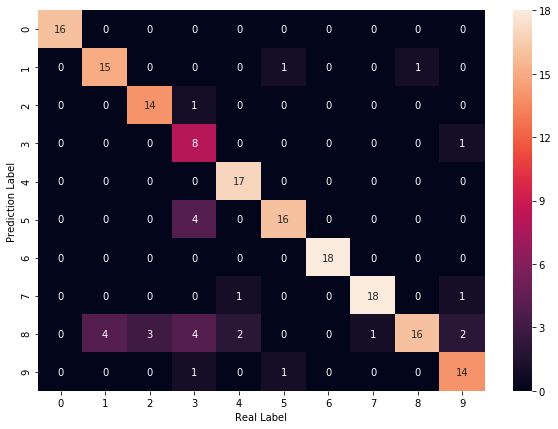

In [22]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [25]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [26]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [27]:
np.sum(list_P == digits.target[:1617])/1617

0.9449598021026593

In [34]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [35]:
np.mean(winner_fitness)

0.9844289059594055